In [1]:
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow
from tensorflow import keras
tensorflow.random.set_seed(2)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer, Dropout, GlobalMaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, Conv1D, MaxPooling1D, BatchNormalization, UpSampling1D, Conv1DTranspose
from tensorflow.keras.models import Sequential, Model
from src.models.patient_split import *
from src.preprocessing.heartbeat_split import *

In [8]:
# %cd /Users/Kunal/Projects/TCH_CardiacSignals_F20/TCH_CardiacSignals_F20/
filepath = r"C:\Users\ksrai\Projects\TCH_CardiacSignals_F20\TCH_CardiacSignals_F20\Working_Data\reconstructed_1hb_cae_12.npy"
data = np.load(filepath)
print(data.shape)
f2 = r"C:\Users\ksrai\Projects\TCH_CardiacSignals_F20\TCH_CardiacSignals_F20\Working_Data\Normalized_Fixed_Dim_HBs_Idx12.npy"
d2 = np.load(f2)
print(d2.shape)

(48222, 100, 4)
(48222, 100, 4)


In [ ]:
# data.shape

In [10]:
def read_in(file_index, normalized, train, ratio):
    """
    Reads in a file and can toggle between normalized and original files
    :param file_index: patient number as string
    :param normalized: binary that determines whether the files should be normalized or not
    :param train: binary that determines whether or not we are reading in data to train the model or for encoding
    :param ratio: ratio to split the files into train and test
    :return: returns npy array of patient data across 4 leads
    """
    # filepath = os.path.join("Working_Data", "Normalized_Fixed_Dim_HBs_Idx" + file_index + ".npy")
    # filepath = os.path.join("Working_Data", "1000d", "Normalized_Fixed_Dim_HBs_Idx35.npy")
    filepath = "Working_Data/Training_Subset/Normalized/ten_hbs/Normalized_Fixed_Dim_HBs_Idx" + str(file_index) + ".npy"

    if normalized == 1:
        if train == 1:
            # normal_test,
            normal_train, normal_test, abnormal = patient_split_train(filepath, ratio)
            # noise_factor = 0.5
            # noise_train = normal_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=normal_train.shape)
            return normal_train, normal_test # noise_train  # normal_test,
        elif train == 0:
            training, test, full = patient_split_all(filepath, ratio)
            noise_factor = 0.5
            noise_train = training + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=training.shape)
            return training, noise_train, test, full
    else:
        data = np.load(os.path.join("Working_Data", "Fixed_Dim_HBs_Idx" + file_index + ".npy"))
        return data



In [ ]:
latent_dim = 100
# # Build the encoder
# encoder_inputs = keras.Input(shape=(1000, 4))
# encoder = Sequential()
# encoder.add(InputLayer((1000,4)))
# encoder.add(Conv1D(10, 11, activation="linear", padding="same"))
# encoder.add(Conv1D(10, 7, activation="relu", padding="same"))
# encoder.add(MaxPooling1D(2))
# encoder.add(Flatten())
# encoder.add(Dense(750, activation = 'tanh', kernel_initializer='glorot_normal'))
# # encoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
# # encoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(200, activation = 'relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(latent_dim))

# Build the encoder
# encoder_inputs = keras.Input(shape=(1000, 4))
# encoder = Sequential()
# encoder.add(InputLayer((1000,4)))
# encoder.add(Conv1D(10, 11, activation="linear", padding="same"))
# encoder.add(Conv1D(10, 7, activation="relu", padding="same"))
# encoder.add(MaxPooling1D(2))
# encoder.add(Conv1D(5, 5, activation="relu", padding="same"))
# encoder.add(Conv1D(5, 3, activation="relu", padding="same"))
# encoder.add(MaxPooling1D(2))
# encoder.add(Flatten())
# encoder.add(Dense(750, activation = 'tanh', kernel_initializer='glorot_normal'))
# # encoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
# # encoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(200, activation = 'relu', kernel_initializer='glorot_normal'))
# encoder.add(Dense(latent_dim))

encoder_inputs = keras.Input(shape=(1000, 4))
encoder = Sequential()
encoder.add(InputLayer((1000,4)))
encoder.add(Conv1D(3, 3, activation="relu", padding="same"))
encoder.add(Conv1D(3, 3, activation="relu", padding="same"))
encoder.add(MaxPooling1D(2))
encoder.add(Conv1D(5, 5, activation="relu", padding="same"))
encoder.add(Conv1D(5, 5, activation="relu", padding="same"))
encoder.add(MaxPooling1D(2))
encoder.add(Conv1D(7, 7, activation="relu", padding="same"))
encoder.add(Conv1D(7, 7, activation="relu", padding="same"))
encoder.add(MaxPooling1D())
encoder.add(Conv1D(11, 11, activation="relu", padding="same"))
encoder.add(Conv1D(11, 11, activation="relu", padding="same"))
encoder.add(Flatten())

encoder.add(Dense(latent_dim))





encoder.summary()
####################################################################################################################
# Build the decoder

In [ ]:
# decoder = Sequential()
# decoder.add(InputLayer((latent_dim,)))
# decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(750, activation = 'relu', kernel_initializer='glorot_normal'))
#
# decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
# # decoder.add(UpSampling1D(2))
# decoder.add(Reshape((1000,10)))
# decoder.add(Conv1DTranspose(8, 7, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(4, 11, activation="linear", padding="same"))


# decoder = Sequential()
# decoder.add(InputLayer((latent_dim,)))
# decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(1000, activation = 'relu', kernel_initializer='glorot_normal'))
# decoder.add(Reshape((500,2)))
# decoder.add(UpSampling1D())
# # decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
# # decoder.add(UpSampling1D(2))
# # decoder.add(Reshape((1000,10)))
# decoder.add(Conv1DTranspose(3, 11, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(3, 7, activation="linear", padding="same"))
# # decoder.add(UpSampling1D())
# decoder.add(Conv1DTranspose(4, 7, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))



# decoder.add(InputLayer((latent_dim,)))
# decoder.add(Reshape((25, 4)))
# decoder.add(UpSampling1D())
# decoder.add(Conv1DTranspose(10, 3, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(10, 3, activation="relu", padding="same"))
# decoder.add(UpSampling1D())
# decoder.add(Conv1DTranspose(20, 5, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(20, 5, activation="relu", padding="same"))
# decoder.add(UpSampling1D())
# decoder.add(Conv1DTranspose(20, 7, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(20, 7, activation="relu", padding="same"))
# decoder.add(Reshape((1000,4)))
# decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
# decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(1000, activation='relu', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Dense(2000, activation='relu', kernel_initializer='glorot_normal'))
# # decoder.add(Dense(5000, activation='relu', kernel_initializer='glorot_normal'))
# decoder.add(Reshape((1000, 2)))
# # decoder.add(UpSampling1D())
# # decoder.add(Conv1DTranspose(8, 3, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(8, 5, activation="relu", padding="same"))


decoder = Sequential()
decoder.add(InputLayer((latent_dim,)))
decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
# decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
decoder.add(Dense(400, activation='tanh', kernel_initializer='glorot_normal'))
# decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
decoder.add(Dense(750, activation='tanh', kernel_initializer='glorot_normal'))
decoder.add(Dense(10000, activation='tanh', kernel_initializer='glorot_normal'))
decoder.add(Reshape((1000, 10)))

decoder.add(UpSampling1D())
# decoder.add(Conv1DTranspose(8, 3, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(8, 3, activation="relu", padding="same"))
# decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))


decoder.summary()

In [ ]:
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Input(shape=(1000,4)),
        layers.Conv1D(
            filters=128, kernel_size=7, padding="same", strides=2, activation="tanh"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=64, kernel_size=3, padding="same", strides=2, activation="tanh"
        ),
        layers.Conv1DTranspose(
            filters=64, kernel_size=7, padding="same", strides=2, activation="tanh"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=64, kernel_size=7, padding="same", strides=2, activation="tanh"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same", activation ='linear'),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional, LSTM, TimeDistributed, RepeatVector

# model = keras.Sequential()
# model.add(Bidirectional(LSTM(64, input_shape = (1000,4))))
# model.add(Dropout(rate = 0.25))
# model.add(Dense(1,activation = 'sigmoid'))
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")


In [ ]:
normal, noise, abnormal, all = read_in("1", 1, 0, 0.3)
model.fit(normal, normal, epochs = 20)


In [ ]:
from tensorflow.keras import regularizers
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
model = autoencoder_model(normal)
model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
nb_epochs = 100
batch_size = 10
history = model.fit(normal, normal, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

In [ ]:
normal, noise, abnormal, all = read_in("1", 1, 0, 0.3)
history = model.fit(
    normal,
    normal,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


In [ ]:

def build_autoencoder(sig_shape, encode_size):
    """
    Builds a deterministic autoencoder, returning both the encoder and decoder models
    :param sig_shape: shape of input signal
    :param encode_size: dimension that we want to reduce to
    :return: encoder, decoder models
    """
    latent_dim = 100
    encoder_inputs = keras.Input(shape=(1000, 4))
    encoder = Sequential()
    encoder.add(InputLayer((1000,4)))
    encoder.add(Conv1D(3, 11, activation="tanh", padding="same"))
    encoder.add(Conv1D(5, 7, activation="relu", padding="same"))
    encoder.add(MaxPooling1D(2))
    encoder.add(Conv1D(5, 5, activation="tanh", padding="same"))
    encoder.add(Conv1D(7, 3, activation="tanh", padding="same"))
    encoder.add(MaxPooling1D(2))
    encoder.add(Flatten())
    encoder.add(Dense(750, activation = 'tanh', kernel_initializer='glorot_normal'))
    # encoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    encoder.add(Dense(400, activation = 'tanh', kernel_initializer='glorot_normal'))
    # encoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    encoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    encoder.add(Dense(latent_dim))


    # encoder.summary()
    ####################################################################################################################
    # Build the decoder

    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(750, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(10000, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((1000, 10)))
    # decoder.add(Conv1DTranspose(4, 7, activation="relu", padding="same"))

    decoder = Sequential()
    decoder.add(InputLayer((latent_dim,)))
    decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    decoder.add(Dense(400, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    decoder.add(Dense(750, activation='tanh', kernel_initializer='glorot_normal'))
    decoder.add(Dense(10000, activation='tanh', kernel_initializer='glorot_normal'))
    decoder.add(Reshape((1000, 10)))
    # decoder.add(Conv1DTranspose(8, 3, activation="relu", padding="same"))
    decoder.add(Conv1DTranspose(8, 11, activation="relu", padding="same"))
    decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))

    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(750, activation = 'relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((250,3)))
    # decoder.add(UpSampling1D())
    # # decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(UpSampling1D(2))
    # # decoder.add(Reshape((1000,10)))
    # decoder.add(Conv1DTranspose(5, 11, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(5, 7, activation="linear", padding="same"))
    # decoder.add(UpSampling1D())
    # decoder.add(Conv1DTranspose(10, 7, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(10, 5, activation="linear", padding="same"))
    #
    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(1000, activation = 'relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((500,2)))
    # decoder.add(UpSampling1D())
    # # decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(UpSampling1D(2))
    # # decoder.add(Reshape((1000,10)))
    # decoder.add(Conv1DTranspose(3, 11, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(3, 7, activation="linear", padding="same"))
    # # decoder.add(UpSampling1D())
    # decoder.add(Conv1DTranspose(4, 7, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))


    return encoder, decoder

In [ ]:
normal, noise, abnormal, all = read_in("1", 1, 0, 0.3)
train, valid = train_test_split(normal, train_size=0.85, random_state=1)

In [ ]:
def training_ae(num_epochs, reduced_dim, file_index):
    """
    Training function for deterministic autoencoder model, saves the encoded and reconstructed arrays
    :param num_epochs: number of epochs to use
    :param reduced_dim: goal dimension
    :param file_index: patient number
    :return: None
    """
    normal, noise, abnormal, all = read_in(file_index, 1, 0, 0.3)
    train, valid = train_test_split(normal, train_size=0.85, random_state=1)
    signal_shape = normal.shape[1:]
    batch_size = round(len(train) * 0.01)
    encoder, decoder = build_autoencoder(signal_shape, reduced_dim)

    inp = Input(signal_shape)
    encode = encoder(inp)
    reconstruction = decoder(encode)

    autoencoder = Model(inp, reconstruction)
    opt = keras.optimizers.Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=opt, loss='mse')

    # early_stopping = EarlyStopping(patience=10, min_delta=0.001, mode='min')
    autoencoder = autoencoder.fit(x=train, y=train, epochs=num_epochs, validation_data=(valid, valid), batch_size=batch_size)
    # validation_split=0.25, callbacks=early_stopping
    plt.plot(autoencoder.history['loss'])
    plt.plot(autoencoder.history['val_loss'])
    plt.title('model loss patient' + str(file_index))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # save out the model
    # filename = 'ae_patient_' + str(file_index) + '_dim' + str(reduced_dim) + '_model'
    # autoencoder.save(filename + '.h5')
    # print('Model saved for ' + 'patient ' + str(file_index))

    # using AE to encode other data
    encoded = encoder.predict(all)
    reconstruction = decoder.predict(encoded)

    # save reconstruction, encoded, and input if needed
    # reconstruction_save = os.path.join("Working_Data", "reconstructed_ae_" + str(reduced_dim) + "d_Idx" + str(file_index) + ".npy")
    # encoded_save = os.path.join("Working_Data", "reduced_ae_" + str(reduced_dim) + "d_Idx" + str(file_index) + ".npy")

    reconstruction_save = "Working_Data/Training_Subset/Model_Output/reconstructed_10hb_" + str(file_index) + ".npy"
    encoded_save = "Working_Data/Training_Subset/Model_Output/encoded_10hb_" + str(file_index) + ".npy"

    np.save(reconstruction_save, reconstruction)
    np.save(encoded_save,encoded)

    # if training and need to save test split for MSE calculation
    # input_save = os.path.join("Working_Data","1000d", "original_data_test_ae" + str(100) + "d_Idx" + str(35) + ".npy")
    # np.save(input_save, test)

In [ ]:
def run_ae(num_epochs, encoded_dim):
    """
    Run training autoencoder over all dims in list
    :param num_epochs: number of epochs to train for
    :param encoded_dim: dimension to run on
    :return None, saves arrays for reconstructed and dim reduced arrays
    """
    for patient_ in [1,4,11]: #heartbeat_split.indicies:
        print("Starting on index: " + str(patient_))
        # try:
        training_ae(num_epochs, encoded_dim, patient_)
        print("Completed " + str(patient_) + " reconstruction and encoding, saved test data to assess performance")
        # except:
        #     continue

In [ ]:
#################### Training to be done for 100 epochs for all dimensions ############################################
# run(100, 10)

run_ae(30,100)




In [ ]:
# TIME_STEPS=30
#
# def create_sequences(X, time_steps=TIME_STEPS):
#     Xs= []
#     for i in range(len(X)-time_steps):
#         Xs.append(X.iloc[i:(i+time_steps)].values)
#
#     return np.array(Xs)
#
# X_train, y_train = create_sequences(training, training)
# X_test, y_test = create_sequences(test, test)
#

In [ ]:
# from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))
# model.add(RepeatVector(X_train.shape[1]))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(X_train.shape[2])))
# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [ ]:
# from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))
# model.add(RepeatVector(X_train.shape[1]))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(X_train.shape[2])))
# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [ ]:
nb_epochs = 100
batch_size = 10
history = model.fit(normal, normal, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

In [ ]:
normal, noise, abnormal, all = read_in("1", 1, 0, 0.3)
history = model.fit(
    normal,
    normal,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


In [18]:

def build_autoencoder(sig_shape, encode_size):
    """
    Builds a deterministic autoencoder, returning both the encoder and decoder models
    :param sig_shape: shape of input signal
    :param encode_size: dimension that we want to reduce to
    :return: encoder, decoder models
    """
    latent_dim = 100
    encoder_inputs = keras.Input(shape=(1000, 4))
    encoder = Sequential()
    encoder.add(InputLayer((1000,4)))
    encoder.add(Conv1D(3, 11, activation="tanh", padding="same"))
    encoder.add(Conv1D(5, 7, activation="relu", padding="same"))
    encoder.add(MaxPooling1D(2))
    encoder.add(Conv1D(5, 5, activation="tanh", padding="same"))
    encoder.add(Conv1D(7, 3, activation="tanh", padding="same"))
    encoder.add(MaxPooling1D(2))
    encoder.add(Flatten())
    encoder.add(Dense(750, activation = 'tanh', kernel_initializer='glorot_normal'))
    # encoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    encoder.add(Dense(400, activation = 'tanh', kernel_initializer='glorot_normal'))
    # encoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    encoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    encoder.add(Dense(latent_dim))


    # encoder.summary()
    ####################################################################################################################
    # Build the decoder

    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(750, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(10000, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((1000, 10)))
    # decoder.add(Conv1DTranspose(4, 7, activation="relu", padding="same"))

    decoder = Sequential()
    decoder.add(InputLayer((latent_dim,)))
    decoder.add(Dense(200, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    decoder.add(Dense(400, activation='tanh', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    decoder.add(Dense(750, activation='tanh', kernel_initializer='glorot_normal'))
    decoder.add(Dense(10000, activation='tanh', kernel_initializer='glorot_normal'))
    decoder.add(Reshape((1000, 10)))
    # decoder.add(Conv1DTranspose(8, 3, activation="relu", padding="same"))
    decoder.add(Conv1DTranspose(8, 11, activation="relu", padding="same"))
    decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))

    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(750, activation = 'relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((250,3)))
    # decoder.add(UpSampling1D())
    # # decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(UpSampling1D(2))
    # # decoder.add(Reshape((1000,10)))
    # decoder.add(Conv1DTranspose(5, 11, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(5, 7, activation="linear", padding="same"))
    # decoder.add(UpSampling1D())
    # decoder.add(Conv1DTranspose(10, 7, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(10, 5, activation="linear", padding="same"))
    #
    # decoder = Sequential()
    # decoder.add(InputLayer((latent_dim,)))
    # decoder.add(Dense(200, activation = 'tanh', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(300, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(400, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
    # decoder.add(Dense(1000, activation = 'relu', kernel_initializer='glorot_normal'))
    # decoder.add(Reshape((500,2)))
    # decoder.add(UpSampling1D())
    # # decoder.add(Dense(10000, activation = 'relu', kernel_initializer='glorot_normal'))
    # # decoder.add(UpSampling1D(2))
    # # decoder.add(Reshape((1000,10)))
    # decoder.add(Conv1DTranspose(3, 11, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(3, 7, activation="linear", padding="same"))
    # # decoder.add(UpSampling1D())
    # decoder.add(Conv1DTranspose(4, 7, activation="relu", padding="same"))
    # decoder.add(Conv1DTranspose(4, 5, activation="linear", padding="same"))


    return encoder, decoder

In [13]:
normal, noise, abnormal, all = read_in("1", 1, 0, 0.3)
train, valid = train_test_split(normal, train_size=0.85, random_state=1)

In [22]:
def training_ae(num_epochs, reduced_dim, file_index):
    """
    Training function for deterministic autoencoder model, saves the encoded and reconstructed arrays
    :param num_epochs: number of epochs to use
    :param reduced_dim: goal dimension
    :param file_index: patient number
    :return: None
    """
    normal, noise, abnormal, all = read_in(file_index, 1, 0, 0.3)
    train, valid = train_test_split(normal, train_size=0.85, random_state=1)
    signal_shape = normal.shape[1:]
    batch_size = round(len(train) * 0.01)
    encoder, decoder = build_autoencoder(signal_shape, reduced_dim)

    inp = Input(signal_shape)
    encode = encoder(inp)
    reconstruction = decoder(encode)

    autoencoder = Model(inp, reconstruction)
    opt = keras.optimizers.Adam(learning_rate=0.001)
    autoencoder.compile(optimizer=opt, loss='mse')

    # early_stopping = EarlyStopping(patience=10, min_delta=0.001, mode='min')
    autoencoder = autoencoder.fit(x=train, y=train, epochs=num_epochs, validation_data=(valid, valid), batch_size=batch_size)
    # validation_split=0.25, callbacks=early_stopping
    plt.plot(autoencoder.history['loss'])
    plt.plot(autoencoder.history['val_loss'])
    plt.title('model loss patient' + str(file_index))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # save out the model
    # filename = 'ae_patient_' + str(file_index) + '_dim' + str(reduced_dim) + '_model'
    # autoencoder.save(filename + '.h5')
    # print('Model saved for ' + 'patient ' + str(file_index))

    # using AE to encode other data
    encoded = encoder.predict(all)
    reconstruction = decoder.predict(encoded)

    # save reconstruction, encoded, and input if needed
    # reconstruction_save = os.path.join("Working_Data", "reconstructed_ae_" + str(reduced_dim) + "d_Idx" + str(file_index) + ".npy")
    # encoded_save = os.path.join("Working_Data", "reduced_ae_" + str(reduced_dim) + "d_Idx" + str(file_index) + ".npy")

    reconstruction_save = "Working_Data/Training_Subset/Model_Output/reconstructed_10hb_" + str(file_index) + ".npy"
    encoded_save = "Working_Data/Training_Subset/Model_Output/encoded_10hb_" + str(file_index) + ".npy"

    np.save(reconstruction_save, reconstruction)
    np.save(encoded_save,encoded)

    # if training and need to save test split for MSE calculation
    # input_save = os.path.join("Working_Data","1000d", "original_data_test_ae" + str(100) + "d_Idx" + str(35) + ".npy")
    # np.save(input_save, test)

In [15]:
def run_ae(num_epochs, encoded_dim):
    """
    Run training autoencoder over all dims in list
    :param num_epochs: number of epochs to train for
    :param encoded_dim: dimension to run on
    :return None, saves arrays for reconstructed and dim reduced arrays
    """
    for patient_ in [1,4,11]: #heartbeat_split.indicies:
        print("Starting on index: " + str(patient_))
        # try:
        training_ae(num_epochs, encoded_dim, patient_)
        print("Completed " + str(patient_) + " reconstruction and encoding, saved test data to assess performance")
        # except:
        #     continue

Starting on index: 1
Epoch 1/30
88/88 [==============================] - 11s 129ms/step - loss: 0.3907 - val_loss: 0.2692

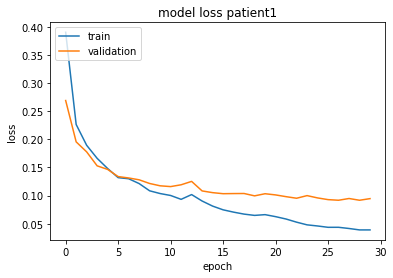

KeyboardInterrupt: 

In [23]:
#################### Training to be done for 100 epochs for all dimensions ############################################
# run(100, 10)

run_ae(30,100)




In [ ]:
# TIME_STEPS=30
#
# def create_sequences(X, time_steps=TIME_STEPS):
#     Xs= []
#     for i in range(len(X)-time_steps):
#         Xs.append(X.iloc[i:(i+time_steps)].values)
#
#     return np.array(Xs)
#
# X_train, y_train = create_sequences(training, training)
# X_test, y_test = create_sequences(test, test)
#

In [ ]:
# from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))
# model.add(RepeatVector(X_train.shape[1]))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(rate=0.2))
# model.add(TimeDistributed(Dense(X_train.shape[2])))
# model.compile(optimizer='adam', loss='mse')
# model.summary()